# Unevenly Spaced Data

In [1]:
using Multitaper, Plots, FINUFFT

┌ Info: Precompiling Multitaper [a81958ac-9ec9-4086-814d-3ae87249a5e8]
└ @ Base loading.jl:1278


The generalized prolate spheroidal sequences (Bronez, 1988) solve the generalized eigenvalue equation when the observing times are unevenly spaced. We follow the example in (Chave, 2019).

In [2]:
N = 1000
t = (0.0:(N-1)).^(1.05)

W = 0.008
K = 5
f0 = 0.0

lam, u, R = gpss(W, K, t, f0);
lam, u = Multitaper.gpss_orth(W, K, t, f0);

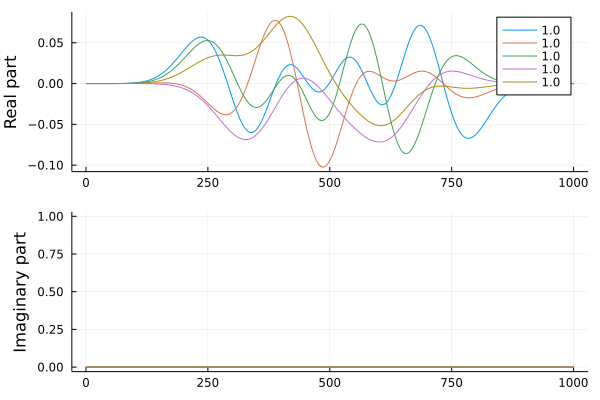

In [3]:
p1 = plot(real.(u), ylabel="Real part", label = round.(lam, digits= 7)') 
p2 = plot(imag.(u), ylabel="Imaginary part", legend = false) 

plot(p1, p2, layout = (2,1))

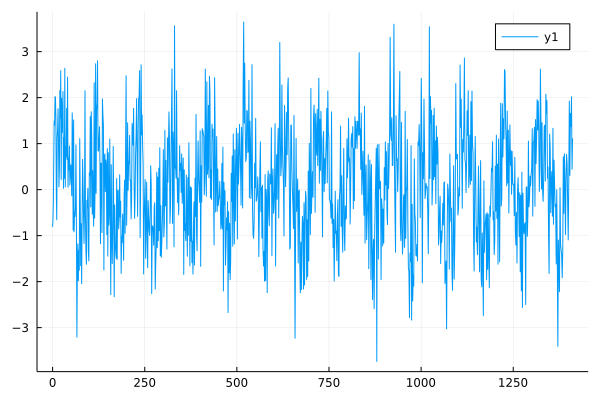

In [4]:
x = sin.(2*pi*0.01*t) + randn(N)
plot(t,x)

In [5]:
freq = collect(LinRange(-pi, pi, length(t)))
Pxx = abs2.(nufft1d3(t,ComplexF64.(x),-1,1e-15,freq))/N

1000-element Array{Float64,1}:
 2.360704275461842
 0.10434983961823593
 1.498840347568322
 0.22584753491294612
 0.18849948949697165
 0.025484156643691098
 0.6820170060438104
 2.453218149425969
 3.3304844710198735
 0.6616196931461172
 3.0502136252977885
 1.2963143920177542
 2.8642992295600416
 ⋮
 1.296314392018322
 3.0502136252967538
 0.6616196931463209
 3.3304844710198735
 2.453218149426075
 0.6820170060435722
 0.025484156643774538
 0.18849948949683876
 0.22584753491280588
 1.498840347568674
 0.10434983961823627
 2.3607042754618424

In [6]:
Sb = bspec(t, x, W, K, 0.5, 0.0, false)

MTSpectrum{EigenCoefficient,Array{Float64,1},Nothing}([0.0, 0.006283185307179587, 0.012566370614359173, 0.01884955592153876, 0.025132741228718346, 0.031415926535897934, 0.03769911184307752, 0.0439822971502571, 0.05026548245743669, 0.05654866776461627  …  3.078760800517997, 3.085043985825177, 3.0913271711323564, 3.097610356439536, 3.1038935417467157, 3.1101767270538954, 3.1164599123610746, 3.122743097668254, 3.129026282975434, 3.1353094682826135], [0.23780142922542474, 0.2115498587551516, 0.4326884897055776, 0.32879401409193554, 0.2145631744724938, 0.315724401688914, 0.2690748863410396, 0.33298436097529255, 0.334100537795202, 0.2866613444930291  …  3.0444133640103233, 2.9549961923487604, 2.897793788624357, 3.1623263901173315, 3.304512899837431, 3.0152677812424558, 3.208930237158211, 3.7626556664428206, 2.076352962776695, 1.5116517859478154], nothing, MTParameters(8.0, 5, 1000, 1.0, 1000, 1, nothing), EigenCoefficient(Complex{Float64}[-0.19296248506459537 + 0.41458045618288347im -0.19096

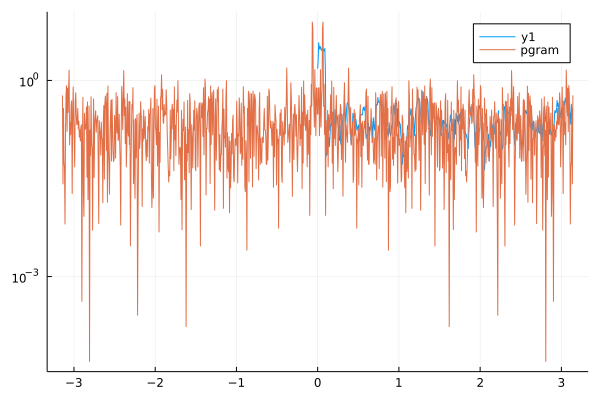

In [10]:
plot(Sb.f, Sb.S[end:-1:1]) #, xlims = [0.0, 0.5])
plot!(freq/pi, Pxx/4, yscale = :log10, label = "pgram")